In [22]:
#library
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    roc_curve
)




In [23]:
DATA_PATH = "D:/DATA SHASKI/university/sms 3/UTS MLOPS/golf-prediction/data/golf_dataset_long_format_with_text.csv"
os.listdir = ("D:/DATA SHASKI/university/sms 3/UTS MLOPS/golf-prediction/data/golf_dataset_long_format_with_text.csv")
df = pd.read_csv(DATA_PATH)

df.head()

os.getcwd()

'd:\\DATA SHASKI\\university\\sms 3\\UTS MLOPS\\golf-prediction\\notebook'

In [24]:
print("Shape (baris, kolom):", df.shape)
print("\nInfo dataframe:")
df.info()

print("\nDescriptive stats (numerik):")
df.describe()


Shape (baris, kolom): (7665, 16)

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7665 entries, 0 to 7664
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             7665 non-null   object 
 1   Weekday          7665 non-null   int64  
 2   Holiday          7665 non-null   int64  
 3   Month            7665 non-null   object 
 4   Season           7665 non-null   object 
 5   Temperature      7665 non-null   float64
 6   Humidity         7665 non-null   float64
 7   Windy            7665 non-null   int64  
 8   Outlook          7665 non-null   object 
 9   Crowdedness      7665 non-null   float64
 10  EmailCampaign    7665 non-null   object 
 11  MaintenanceTask  7665 non-null   object 
 12  ID               7665 non-null   object 
 13  Play             7665 non-null   int64  
 14  PlayTimeHour     7665 non-null   float64
 15  Review           1352 non-null   object 
dtypes: float64

,Weekday,Holiday,Temperature,Humidity,Windy,Crowdedness,Play,PlayTimeHour
count,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000
mean,3.005479,0.044749,13.435525,61.525114,0.507763,0.620721,0.182518,0.642035
std,2.000580,0.206766,8.040172,14.429511,0.499972,0.150415,0.386296,1.381454
min,0.000000,0.000000,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,6.000000,52.000000,0.000000,0.530000,0.000000,0.000000
50%,3.000000,0.000000,13.800000,61.000000,1.000000,0.630000,0.000000,0.000000
75%,5.000000,0.000000,20.500000,72.000000,1.000000,0.720000,0.000000,0.000000
max,6.000000,1.000000,29.500000,99.000000,1.000000,1.000000,1.000000,5.200000


In [25]:
df.isnull().sum().sort_values(ascending=False)


Review             6313
Date                  0
Holiday               0
Weekday               0
Season                0
Temperature           0
Humidity              0
Month                 0
Windy                 0
Outlook               0
EmailCampaign         0
Crowdedness           0
MaintenanceTask       0
ID                    0
Play                  0
PlayTimeHour          0
dtype: int64

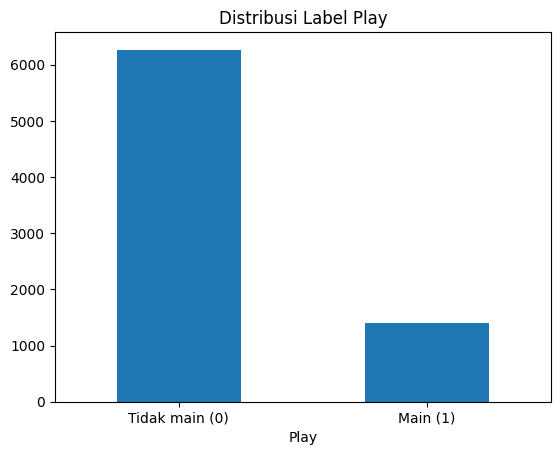

In [26]:
#distribusi target pemain 'play'
df['Play'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Tidak main (0)', 'Main (1)'], rotation=0)
plt.title("Distribusi Label Play")
plt.show()



In [27]:
# kolom yang dipakai sebagai fitur
feature_cols = [
    "Weekday",
    "Holiday",
    "Month",
    "Season",
    "Temperature",
    "Humidity",
    "Windy",
    "Outlook",
    "Crowdedness",
    "EmailCampaign",
    "ID"
]

target_col = "Play"

X = df[feature_cols].copy()
y = df[target_col].astype(int)  # pastikan 0/1 int

X.head(), y.head()


(   Weekday  Holiday Month  Season  Temperature  Humidity  Windy Outlook  \
 0        4        1   Jan  Winter          3.3      49.0      1   sunny   
 1        4        1   Jan  Winter          3.3      49.0      1   sunny   
 2        4        1   Jan  Winter          3.3      49.0      1   sunny   
 3        4        1   Jan  Winter          3.3      49.0      1   sunny   
 4        4        1   Jan  Winter          3.3      49.0      1   sunny   
 
    Crowdedness                                      EmailCampaign ID  
 0         0.73  Happy New Year and welcome to the Golf Course!...  A  
 1         0.73  Happy New Year and welcome to the Golf Course!...  B  
 2         0.73  Happy New Year and welcome to the Golf Course!...  C  
 3         0.73  Happy New Year and welcome to the Golf Course!...  D  
 4         0.73  Happy New Year and welcome to the Golf Course!...  E  ,
 0    1
 1    0
 2    0
 3    1
 4    1
 Name: Play, dtype: int64)

In [28]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numerical columns   :", num_cols)
print("Categorical columns :", cat_cols)


Numerical columns   : ['Weekday', 'Holiday', 'Temperature', 'Humidity', 'Windy', 'Crowdedness']
Categorical columns : ['Month', 'Season', 'Outlook', 'EmailCampaign', 'ID']


before balance:
Play
0    6266
1    1399
Name: count, dtype: int64

after balance:
Play
1    6266
0    6266
Name: count, dtype: int64


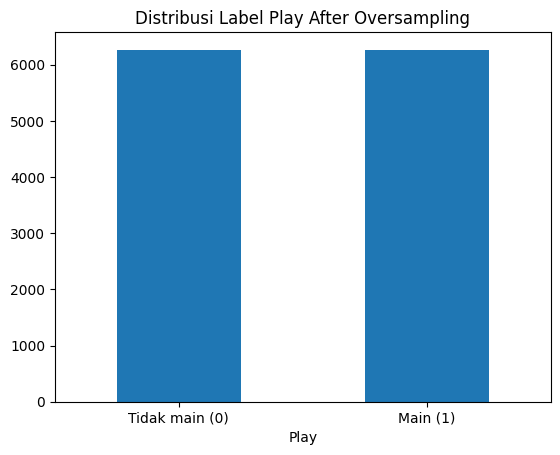

In [29]:
#dari codingan di atas dapat dilihat bahwa perbedaan datanya sangat jauh yang dimana tidak balanced
#maka dari itu setelah di split saya mencoba balance secara manual over sample yang dimana akan
#menambahkan kuantitas dari "play"


# gabung fitur + target dulu
df_model = X.copy()
df_model["Play"] = y

# divide mayoritas & minoritas
df_major = df_model[df_model["Play"] == 0]
df_minor = df_model[df_model["Play"] == 1]

print("before balance:")
print(df_model["Play"].value_counts())

# oversampling manual
df_minor_upsampled = df_minor.sample(
    n=len(df_major),
    replace=True,
    random_state=42
)

# gabungin lagi & shuffle
df_balanced = pd.concat([df_major, df_minor_upsampled]).sample(
    frac=1,
    random_state=42
)

print("\nafter balance:")
print(df_balanced["Play"].value_counts())

df_balanced['Play'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Tidak main (0)', 'Main (1)'], rotation=0)
plt.title('Distribusi Label Play After Oversampling')
plt.show()




In [30]:
# split dulu

X_bal = df_balanced[feature_cols]
y_bal = df_balanced["Play"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_bal,
    y_bal,
    test_size=0.2,
    stratify=y_bal,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)
print("Distribusi train:\n", y_train.value_counts())
print("Distribusi test:\n", y_test.value_counts())


Train shape: (10025, 11)
Test shape : (2507, 11)
Distribusi train:
 Play
1    5013
0    5012
Name: count, dtype: int64
Distribusi test:
 Play
0    1254
1    1253
Name: count, dtype: int64


In [ ]:
#preprocessing
numeric_tf = SimpleImputer(strategy="mean")

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ]
)


In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

logreg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(
        max_iter=1000
    ))
])

print("Training Logistic Regression...")
logreg_clf.fit(X_train, y_train)

y_pred_log = logreg_clf.predict(X_test)
y_prob_log = logreg_clf.predict_proba(X_test)[:, 1]

print("\n=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_log))
print("\nClassification report:")
print(classification_report(y_test, y_pred_log))


Training Logistic Regression...

=== Logistic Regression ===
Accuracy : 0.7183885121659354
ROC-AUC  : 0.7891675608523594

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1254
           1       0.70      0.77      0.73      1253

    accuracy                           0.72      2507
   macro avg       0.72      0.72      0.72      2507
weighted avg       0.72      0.72      0.72      2507



C:\Users\sitim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

print("Training Random Forest...")
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))


Training Random Forest...

=== Random Forest ===
Accuracy : 0.9812524930195453
ROC-AUC  : 0.9987844166027054

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1254
           1       0.97      1.00      0.98      1253

    accuracy                           0.98      2507
   macro avg       0.98      0.98      0.98      2507
weighted avg       0.98      0.98      0.98      2507



In [36]:
#dari codingan di atas sepertinya accuracy terlalu tinggi, maka dari itu random forest direvisi

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

# Model Random Forest yang DI-BATASI biar ga overfit
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest (anti overfitting)...")
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest (Regularized) ===")
print("Test Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Test ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))


Training Random Forest (anti overfitting)...

=== Random Forest (Regularized) ===
Test Accuracy : 0.6900678101316314
Test ROC-AUC  : 0.7648256624293084

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1254
           1       0.68      0.71      0.70      1253

    accuracy                           0.69      2507
   macro avg       0.69      0.69      0.69      2507
weighted avg       0.69      0.69      0.69      2507



In [37]:
#check overfit, cek train vs test
y_pred_train_rf = rf_clf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train_rf)
test_acc = accuracy_score(y_test, y_pred_rf)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.7028428927680798
Test Accuracy : 0.6900678101316314


In [38]:

#fitur mana yang paling berpengaruh terhadap pemain
# Ambil model & preprocessor yang sudah fitted
rf_model = rf_clf.named_steps["clf"]
preprocessor_fitted = rf_clf.named_steps["preprocess"]

# Nama fitur setelah one-hot
cat_encoder = preprocessor_fitted.named_transformers_["cat"].named_steps["encoder"]
encoded_cat_names = cat_encoder.get_feature_names_out(cat_cols)

all_feature_names = np.concatenate([num_cols, encoded_cat_names])
importances = rf_model.feature_importances_

idx_sorted = np.argsort(importances)[::-1]

print("Top 15 feature importance:")
for idx in idx_sorted[:15]:
    print(f"{all_feature_names[idx]:30s}  {importances[idx]:.4f}")


Top 15 feature importance:
Weekday                         0.1050
Humidity                        0.0952
Crowdedness                     0.0760
Outlook_sunny                   0.0753
Outlook_rainy                   0.0465
Temperature                     0.0456
ID_E                            0.0410
ID_G                            0.0393
ID_F                            0.0365
Outlook_overcast                0.0330
ID_A                            0.0325
Month_Apr                       0.0311
ID_B                            0.0218
Holiday                         0.0207
Outlook_snow                    0.0168


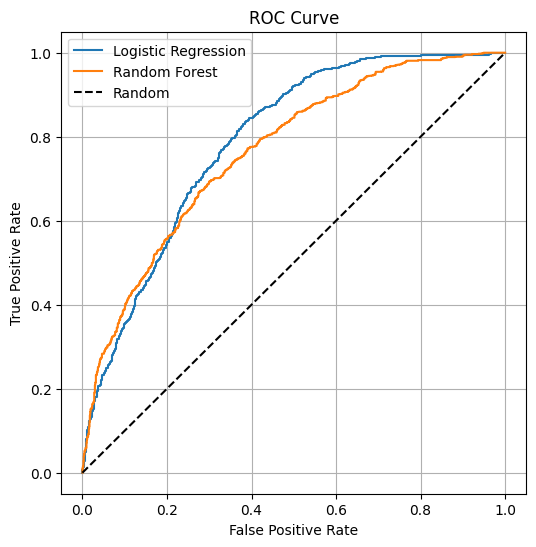

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf,  tpr_rf,  label="Random Forest")
plt.plot([0, 1], [0, 1], "k--", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
